# Actividad Módulo 25: Introducción a Machine Learning Parte 1
1. Exploración básica de EDA utilizando tail, sample, shape, info
2. Validar si es que existen nulos o información vacía en el dataset, tipo de datos, describe, nunique
3. Correlación y heatmap y visualización de la distribución utilizando sns.distplot
4. Eliminación de variables con alta correlación y/o que no sean necesarias
5. Reportes por grupos (cuántos registros): 
    - Estado civil
    - Educación
    - Trabajo
6. Análisis univariado y bivariado basado en la predicción y/n
7. Dividir dataset en training y testing (70%-30%)

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# 1. Importar el dataset, tail, sample, shape, info
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [33]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
18991,45,services,married,high.school,unknown,yes,no,cellular,aug,mon,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.970,5228.1,no
28394,51,services,married,high.school,unknown,no,no,cellular,apr,thu,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.435,5099.1,no
8030,55,retired,divorced,basic.6y,unknown,no,no,telephone,jun,mon,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
27119,35,admin.,divorced,university.degree,no,no,no,cellular,nov,fri,...,6,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
2371,36,admin.,married,high.school,no,no,yes,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
32640,35,blue-collar,married,unknown,no,yes,no,cellular,may,mon,...,8,10,1,success,-1.8,92.893,-46.2,1.299,5099.1,no
2055,35,admin.,married,university.degree,no,yes,no,telephone,may,mon,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
222,36,services,single,basic.6y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2217,54,technician,married,university.degree,unknown,no,yes,telephone,may,mon,...,7,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
25360,30,services,married,high.school,no,yes,no,cellular,nov,tue,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no


In [34]:
df.shape

(41188, 21)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [36]:
# 2.1 Validar si existen valores nulos o información faltante

df.isnull().sum().sum()     # NO EXITEN VALORES NULOS

0

In [37]:
# 2.2 Tipo de datos arriba en df.info()
# 2.3 Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [38]:
# Número de valores únicos por columna
for column in df.columns:
    print(f'Hay {df[column].nunique()} valores únicos para la columna {column}')

Hay 78 valores únicos para la columna age
Hay 12 valores únicos para la columna job
Hay 4 valores únicos para la columna marital
Hay 8 valores únicos para la columna education
Hay 3 valores únicos para la columna default
Hay 3 valores únicos para la columna housing
Hay 3 valores únicos para la columna loan
Hay 2 valores únicos para la columna contact
Hay 10 valores únicos para la columna month
Hay 5 valores únicos para la columna day_of_week
Hay 1544 valores únicos para la columna duration
Hay 42 valores únicos para la columna campaign
Hay 27 valores únicos para la columna pdays
Hay 8 valores únicos para la columna previous
Hay 3 valores únicos para la columna poutcome
Hay 10 valores únicos para la columna emp.var.rate
Hay 26 valores únicos para la columna cons.price.idx
Hay 26 valores únicos para la columna cons.conf.idx
Hay 316 valores únicos para la columna euribor3m
Hay 11 valores únicos para la columna nr.employed
Hay 2 valores únicos para la columna y


<AxesSubplot: >

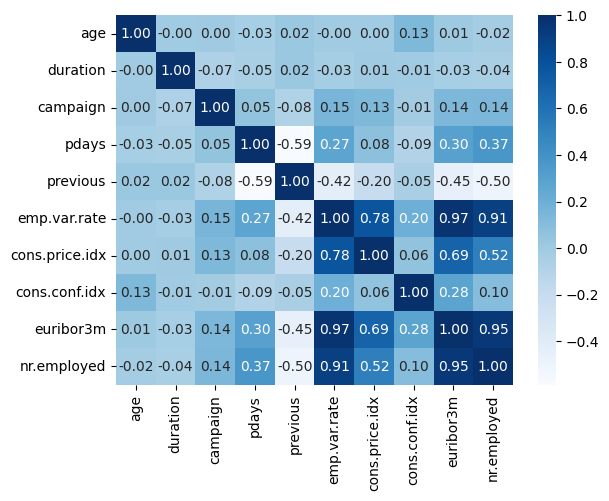

In [39]:
# Correlación y heatmap
sns.heatmap(df.corr(numeric_only=True), cmap='Blues', annot=True, fmt='.2f')

### Insights:
- Existen varibles con alta correlación:
    - cons.price.idx - emp.var.rate
    - euribor3m - emp.var.rate
    - nr.employed - emp.var.rate
    - nr.employed - euribor3m

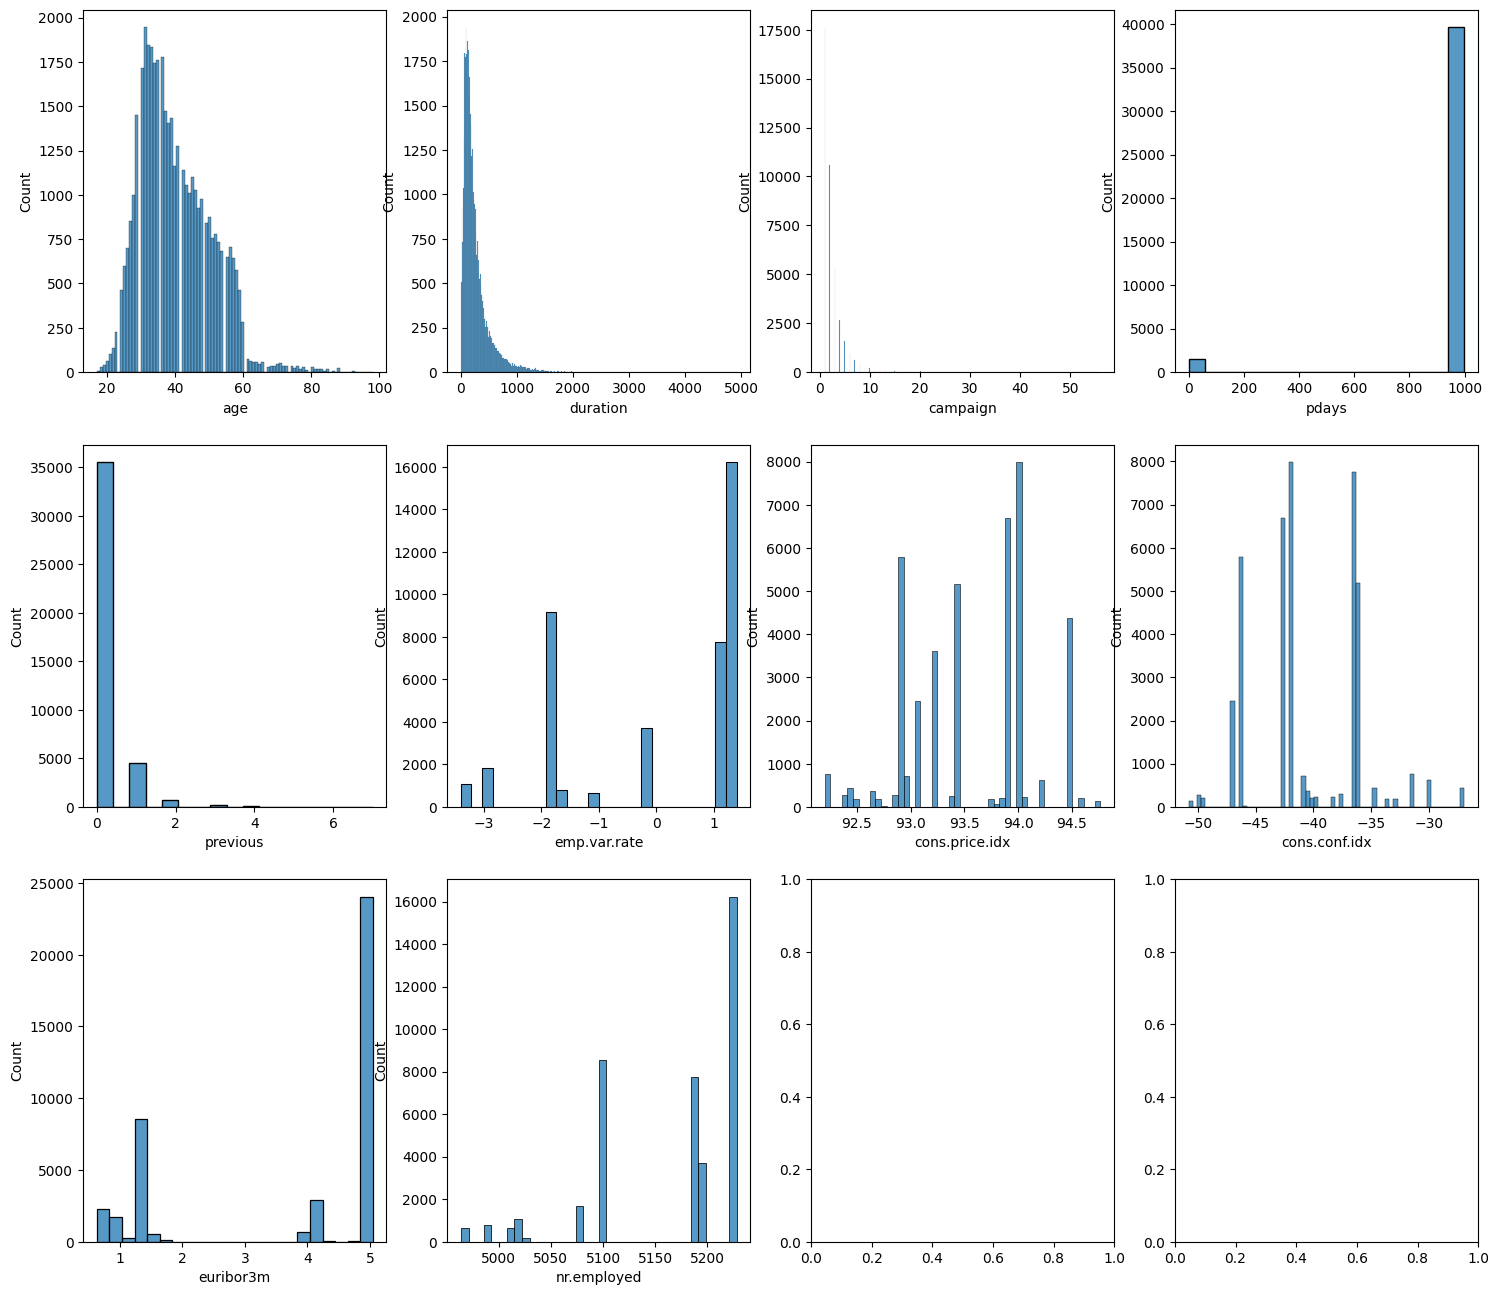

In [40]:
# Visualización de las distribuciones con histogramas
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(18,16))

columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for i, column in enumerate(columns):
    sns.histplot(data=df[column], ax=ax[i//4, i%4], kde=False)


### Insights:
- Se puede ver que la varialbe duration tiene un alto sesgo, pero existen valores muy lejos 
- La gran mayoría de los clientes contactados en esta campaña no habían sido contactados para campañas pasadas
- Por lo mismo que muchos clientes nunca habían sido contactados en campañas anteriores, la mayoría de los clentes están en cero en la columna previous


In [41]:
# Eliminación de variables con alta correlación y variables no necesarias
# Borraré todas las coluumnas con alta correlación y dejaré unicamente emp.var.rate para minimizar la cantidad de columnas que hay y al mismo tiempo es la que engloba a todas 
df.drop(columns=['cons.price.idx', 'euribor3m', 'nr.employed'], inplace=True)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            41188 non-null  int64  
 1   job            41188 non-null  object 
 2   marital        41188 non-null  object 
 3   education      41188 non-null  object 
 4   default        41188 non-null  object 
 5   housing        41188 non-null  object 
 6   loan           41188 non-null  object 
 7   contact        41188 non-null  object 
 8   month          41188 non-null  object 
 9   day_of_week    41188 non-null  object 
 10  duration       41188 non-null  int64  
 11  campaign       41188 non-null  int64  
 12  pdays          41188 non-null  int64  
 13  previous       41188 non-null  int64  
 14  poutcome       41188 non-null  object 
 15  emp.var.rate   41188 non-null  float64
 16  cons.conf.idx  41188 non-null  float64
 17  y              41188 non-null  object 
dtypes: flo

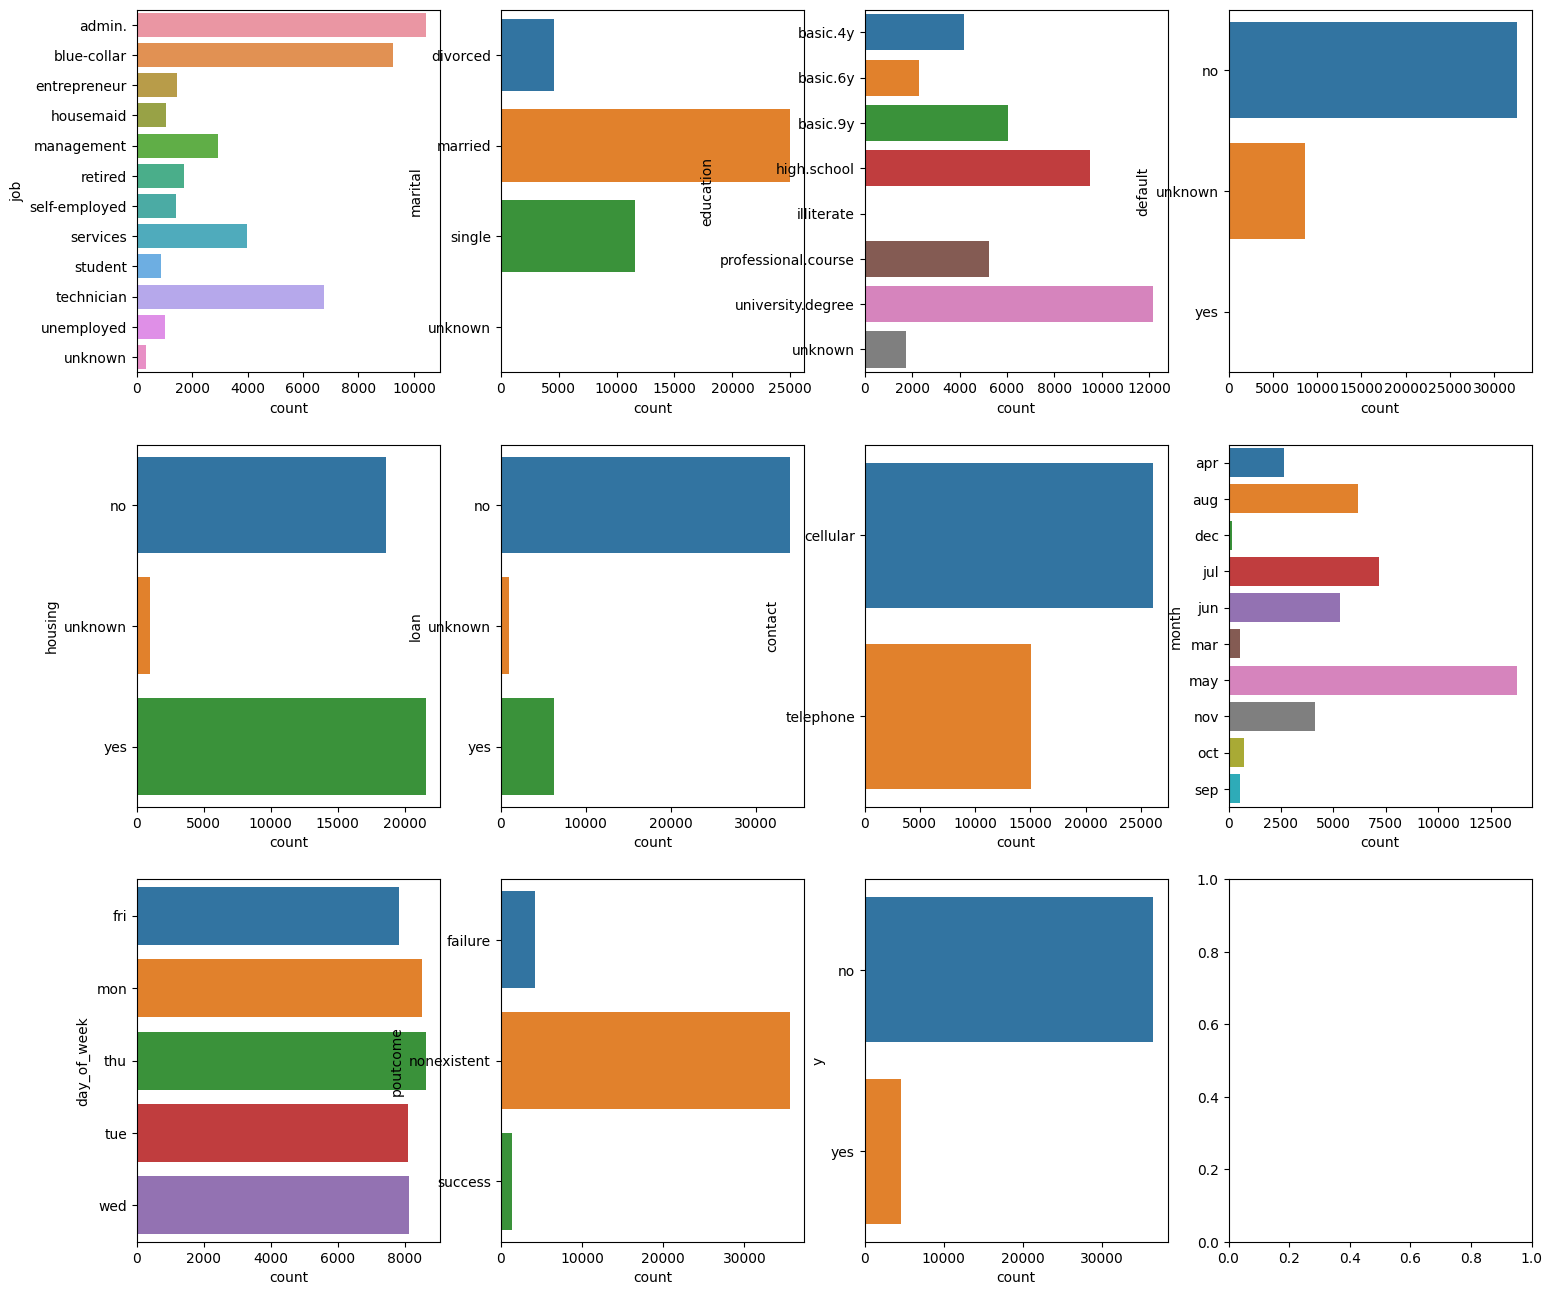

In [43]:
# Reportes por grupos
# Cantidad de registros por categoría de variables categóricas
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(18,16))

categorical_columns = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)

for i, column in enumerate(categorical_columns):
    sns.barplot(data=df.groupby(column).count().reset_index().rename(columns={'age': 'count'}), x='count', y=column,ax=ax[i//4, i%4])

[]

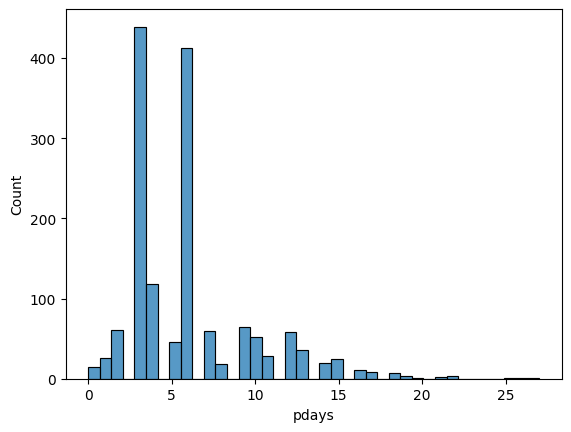

In [44]:
# Análisis univariado y bivariado basado en la predicción y/n
# El análisis univariado ya se hizo mediante los histogramas y gráficos de barras antes presentados
# Lo único que no se puede ver es el histograma de la variable pdays una vez que se quitan los registros de personas que no habían sido contactadas previamente (pdays = 999)
fig = sns.histplot(data=df[df['pdays'] < 999]['pdays'])
fig.plot()

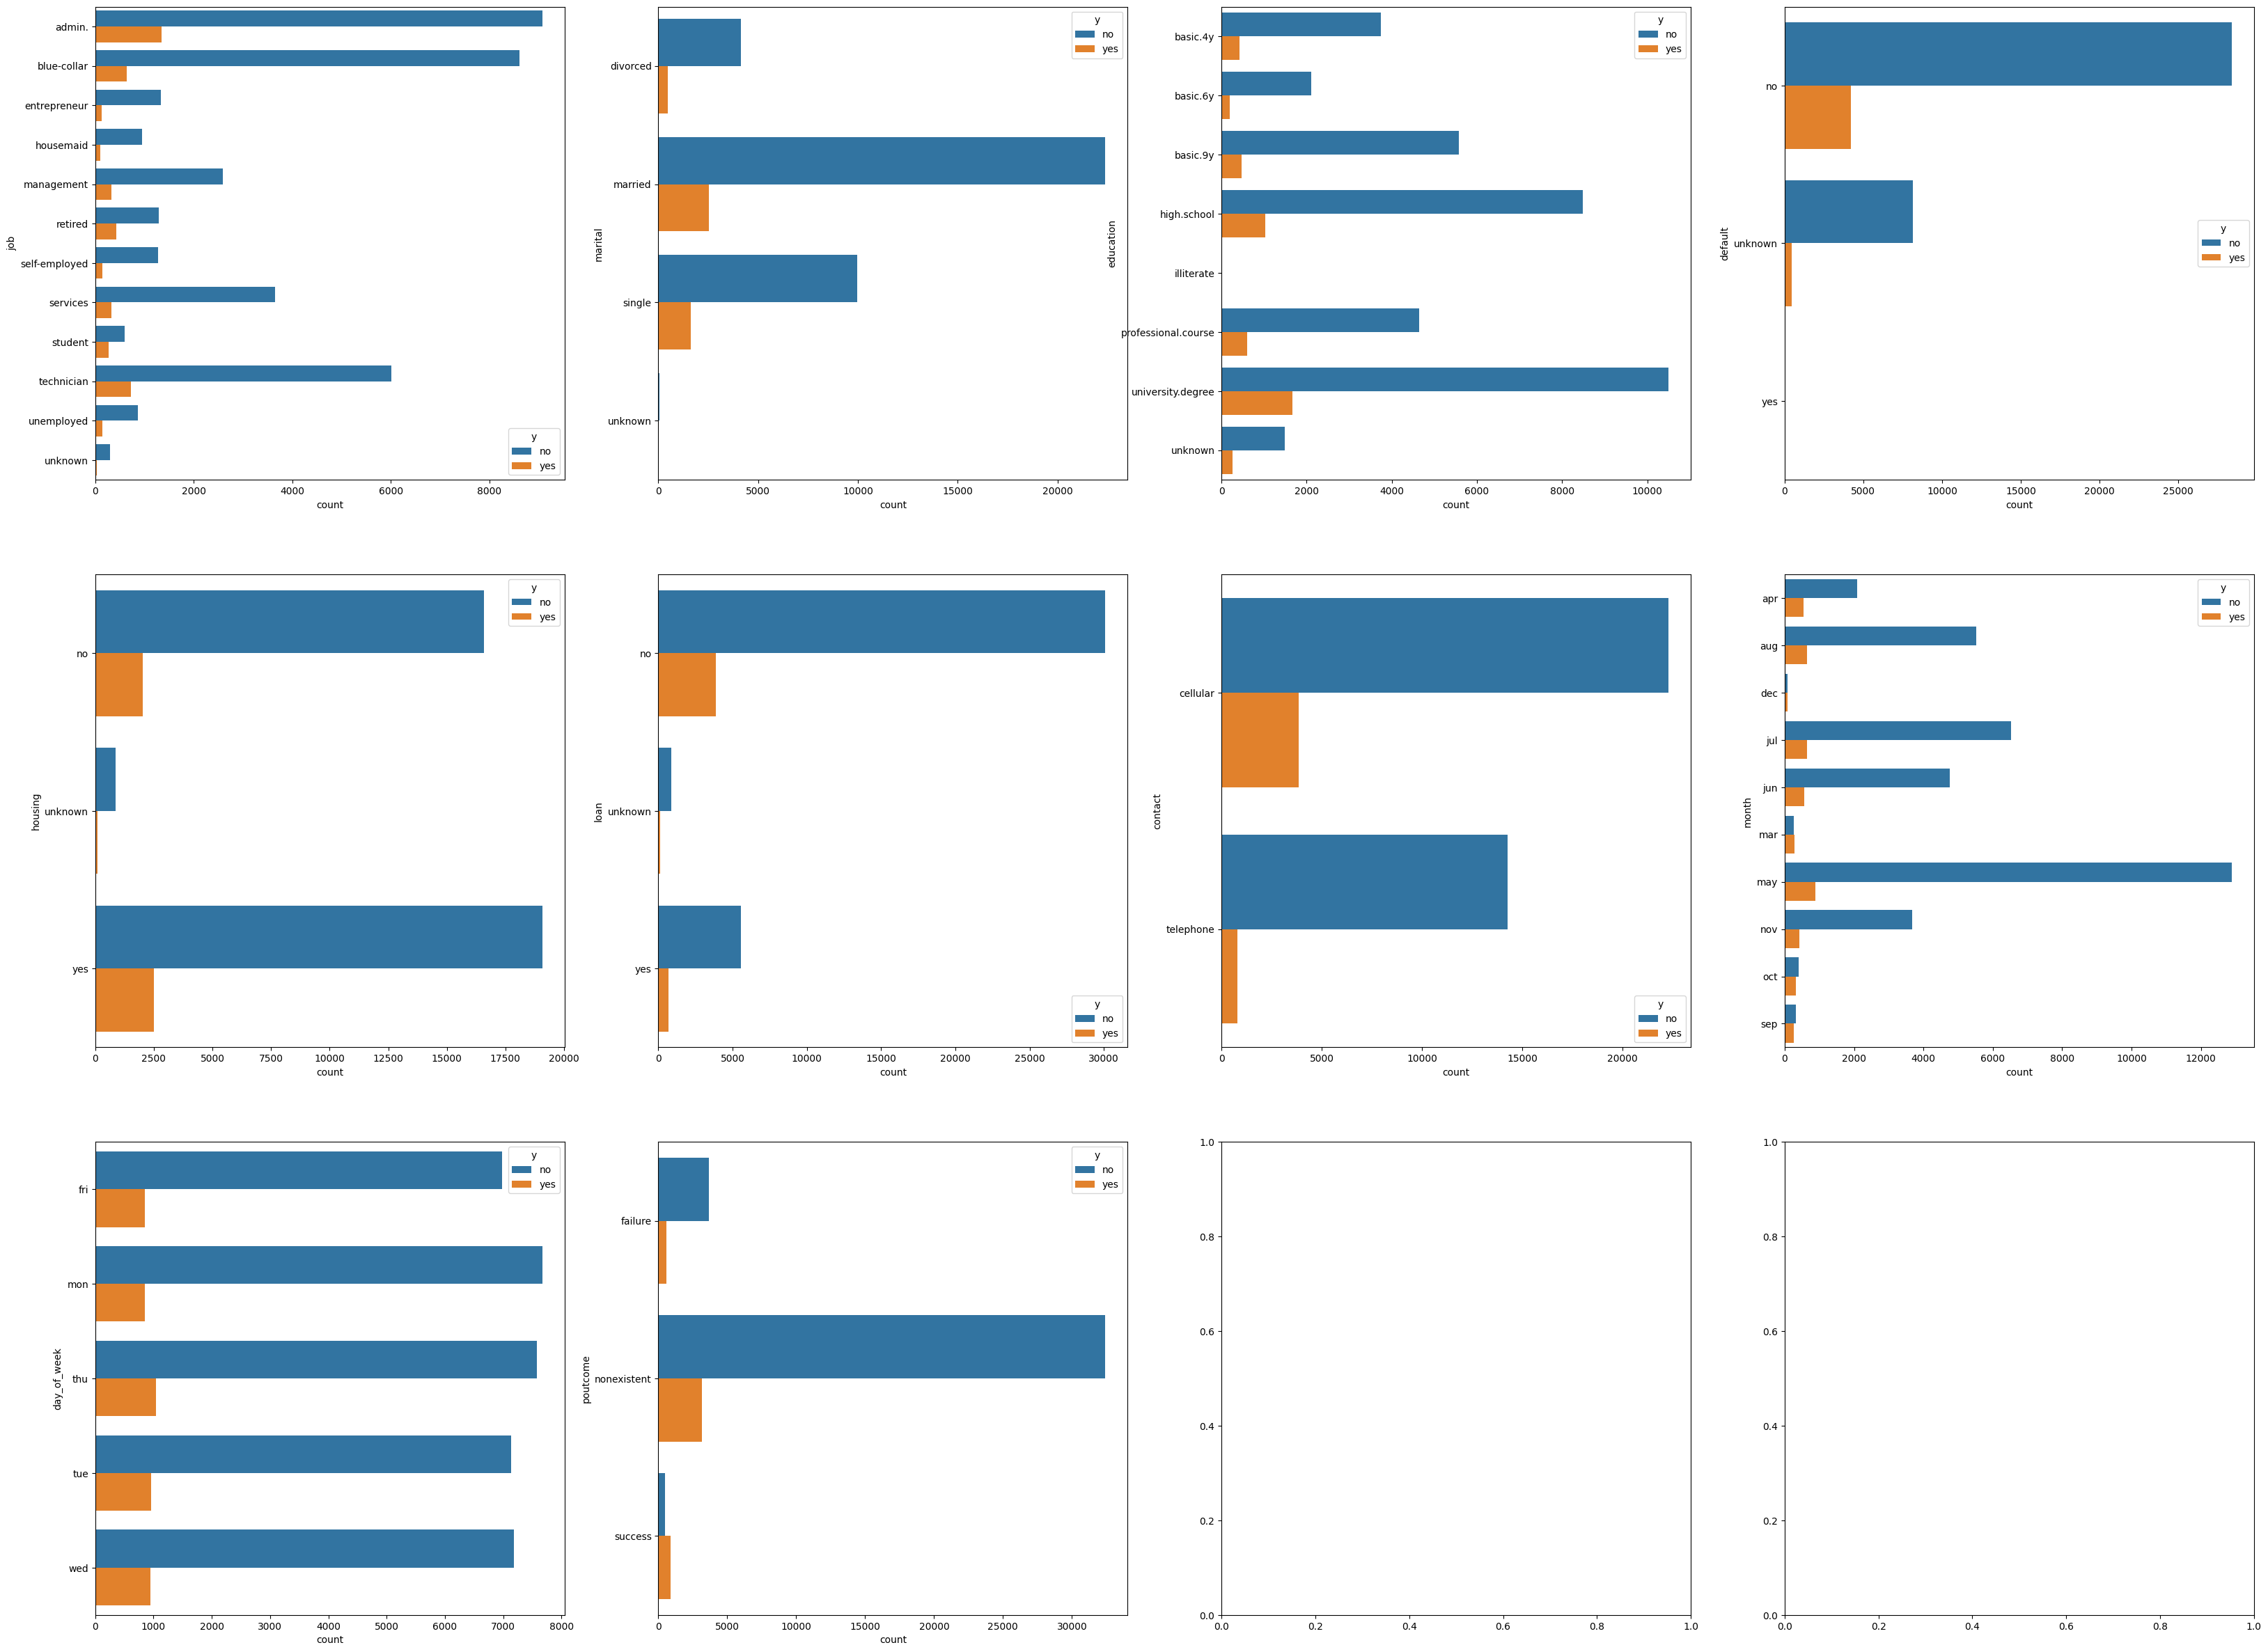

In [45]:
# Análisis bivariado basado en la variable de predicción "y"

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(40,30))

categorical_columns = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)

for i, column in enumerate(categorical_columns):
    if column != 'y':
        sns.barplot(data=df.groupby([column, 'y']).count().reset_index().rename(columns={'age': 'count'}), x='count', y=column,ax=ax[i//4, i%4], hue='y')

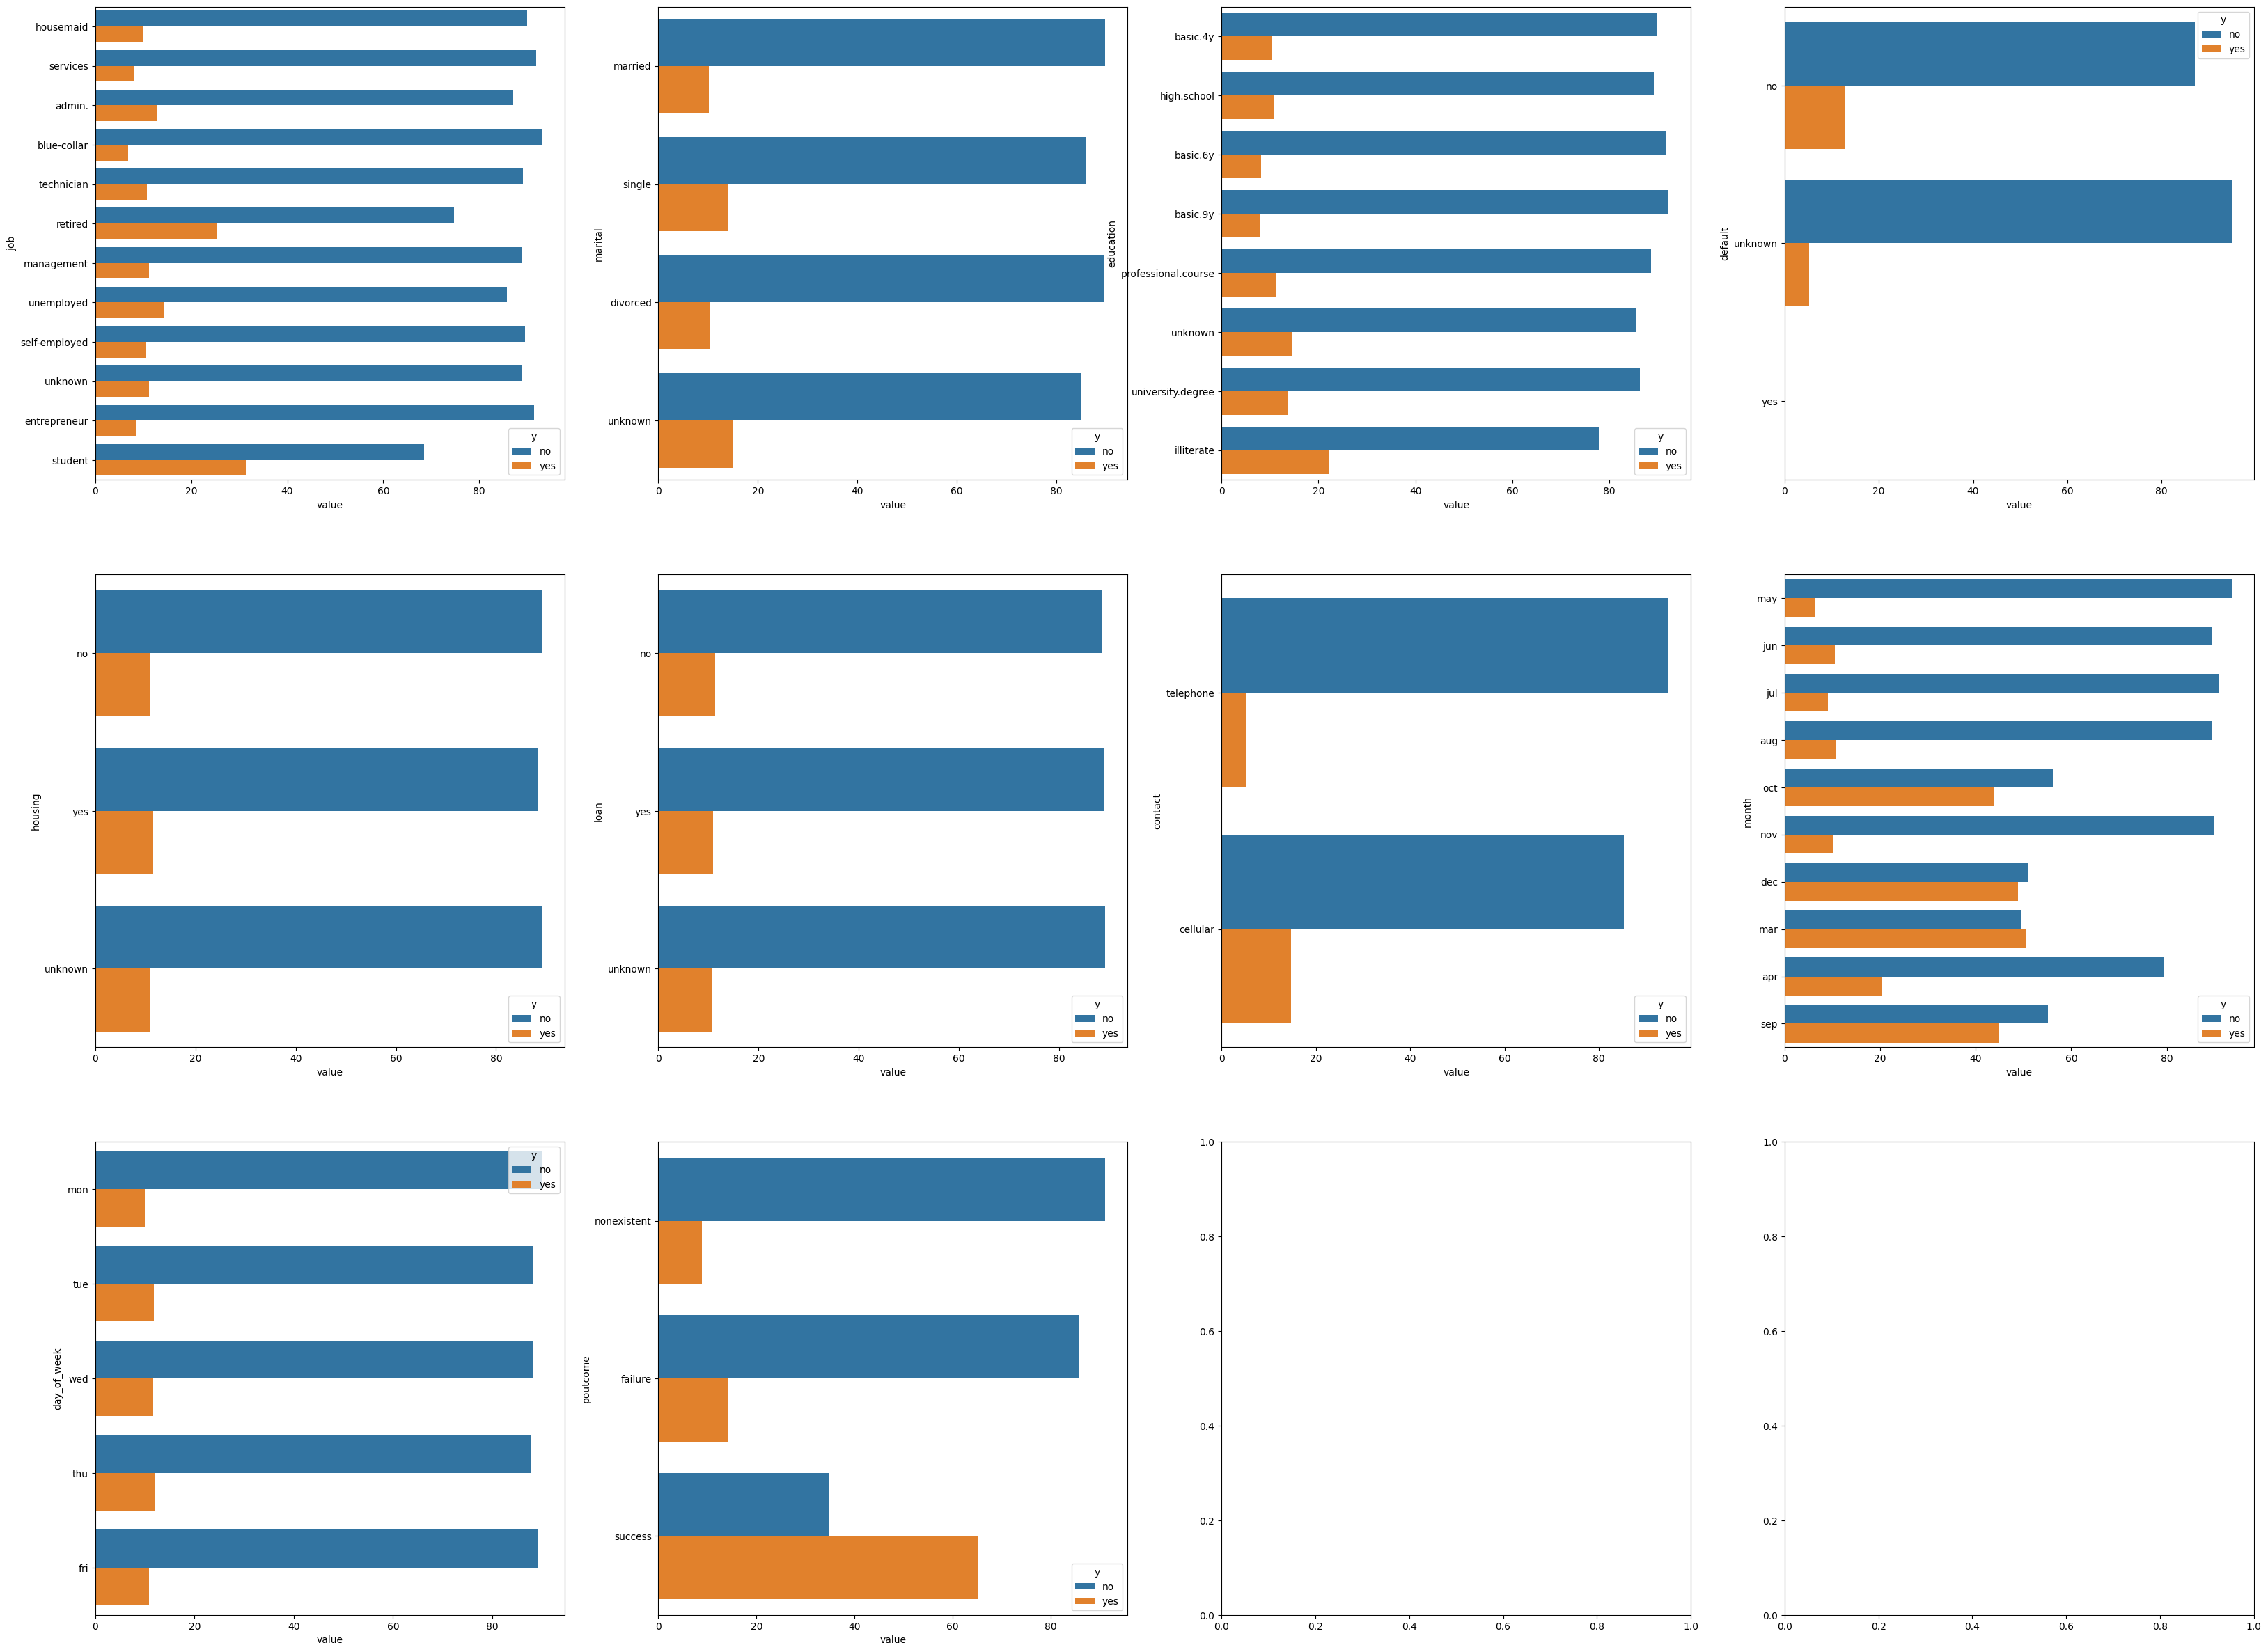

In [46]:
# Análisis univariable utilizando porcentajes

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(40,30))

for i, column in enumerate(categorical_columns):
    if column != 'y':
        groupby_df = df.groupby([column, 'y']).count().reset_index().rename(columns={'age': 'count'})
        
        sns.barplot(data=groupby_df.pivot_table(values='count', aggfunc='sum', index='y', columns=column).apply(lambda x : x*100/sum(x)).reset_index().melt(value_vars=df[column].unique(), id_vars=['y']), x='value', y=column, ax=ax[i//4, i%4], hue='y')

# Insights:
- Se pueden ver que para algunas variables, el success rate (variable y=yes) es significativamente más alto cuando el registro pertenece a un valor específico de esa variable
- Lo que se esperaría de estas últimas gráficas es que, si la variable categorica no tiene efecto sobre el resultado en la variable "y", todas las barras del mismo color sean del mismo tamaño o de un tamaño muy similar entre sí
- Hay categorías de las variables que no tienen un efecto sobre la variable de respuesta "y" como todas las categorías de la variable "day_of_week", todas las categorías de "loan", todas las categorías de "housing", todas las categorías de la variable "marital"
- También hay ciertas categorías de ciertas variables que podrían tener un efecto en la variable de respuesta. Por ejemplo, los clientes con trabajo de estudiante o que estaban retirados fueron con los que más éxito hubo en la campaña del banco. De la misma manera, hubo más éxito en la respuesta para esta campaña con clientes que fueron contactados y con los que se tuvo éxito en campañas pasadas


In [47]:
# Dividir dataset en 70% 30%

df2= df

# Transformar variables numéricas con álto sesgo
numeric_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.conf.idx']
for column in numeric_columns:
    df['log_'+column] = np.log(df[column] + 1)

# Cambiar variable de respuesta por 1 y 0
df['y'] = df['y'].apply(func= lambda x : 1 if x == 'yes' else 0)

# Generar variables categóricas
pd.get_dummies(data=df, drop_first=True)

# Dividir Dataset
from sklearn.model_selection import train_test_split

x = df.drop(columns=['y'])
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)


d:\Programas\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\Programas\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [48]:
print("Original Personal Loan True Values   : {0} ({1:0.2f}%)".format(len(df2.loc[df2['y'] == 1]), (len(df2.loc[df2['y'] == 1])/len(df2.index)) * 100 ))
print("Original Personal Loan False Values  : {0} ({1:0.2f}%)\n".format(len(df2.loc[df2['y'] == 0]), (len(df2.loc[df2['y'] == 0])/len(df2.index)) * 100 ))

print("Training Personal Loan True Values   : {0} ({1:0.2f}%)".format(len(y_train.loc[y_train[:] == 1]), (len(y_train.loc[y_train[:] == 1])/len(y_train.index)) * 100 ))
print("Training Personal Loan False Values  : {0} ({1:0.2f}%)".format(len(y_train.loc[y_train[:] == 0]), (len(y_train.loc[y_train[:] == 0])/len(y_train.index)) * 100 ))
print('The Training dataset contains {0:0.2f}% of the registers in the original dataset\n'.format( len(y_train[:]) / len(df2['y']) * 100))

print("Testing Personal Loan True Values   : {0} ({1:0.2f}%)".format(len(y_test.loc[y_test[:] == 1]), (len(y_test.loc[y_test[:] == 1])/len(y_test.index)) * 100 ))
print("Testing Personal Loan False Values  : {0} ({1:0.2f}%)".format(len(y_test.loc[y_test[:] == 0]), (len(y_test.loc[y_test[:] == 0])/len(y_test.index)) * 100 ))
print('The Testing dataset contains {0:0.2f}% of the registers in the original dataset\n'.format( len(y_test[:]) / len(df2['y']) * 100))

Original Personal Loan True Values   : 4640 (11.27%)
Original Personal Loan False Values  : 36548 (88.73%)

Training Personal Loan True Values   : 3227 (11.19%)
Training Personal Loan False Values  : 25604 (88.81%)
The Training dataset contains 70.00% of the registers in the original dataset

Testing Personal Loan True Values   : 1413 (11.43%)
Testing Personal Loan False Values  : 10944 (88.57%)
The Testing dataset contains 30.00% of the registers in the original dataset

